# The StatQuest Illustrated Guide to Neural Networks and AI
## Chapter 1 - Build a very simple neural network and draw graphs of the output

Copyright 2024, Joshua Starmer

In this notebook, we will build, and draw graphs of the output of the very simple neural network featured in Chapter 1 of **[The StatQuest Illustrated Guide to Neural Networks and AI](https://www.amazon.com/dp/B0DRS71QVQ)** and seen in the figure below.

<img src="https://github.com/StatQuest/signa/blob/main/chapter_01/images/chapter_1_pre_trained_nn.png?raw=1" alt="a pre-trained neural network" style="width: 800px;">

In this tutorial, you will...

- **[Code a neural network with pre-trained weights and biases](#create)** This will show the basic structure of a class that inherits from `nn.Module` and how to use `torch.tensor()` to create pre-trained Weights and Biases.

- **[Run some data through the neural network](#run)** This is called making a **forward pass** through the neural network.

- **[Draw graphs of the y-axis values generated by various parts of the neural network](#draw)** This will show how the y-axis coordinates that come out of the activation functions are scaled and then added up to create the bent shape that fits to the data.

#### NOTE:
This tutorial assumes that you already know the basics of coding in **Python** and have read the first chapter in **The StatQuest Illustrated Guide to Neural Networks and AI**.

----

# Import the modules that will do all the work

The very first thing we need to do is load a bunch of Python modules. Python itself is just a basic programming language. These modules give us extra functionality to create and train a Neural Network.

In [ ]:
%%capture
# %%capture prevents this cell from printing a ton of STDERR stuff to the screen

## NOTE: If you **don't** need to install anything, you can comment out the
##       next line.
##
##       If you **do** need to install something, just know that you may need to
##       restart your session for python to find the new module(s).
##
##       To restart your session:
##       - In Google Colab, click on the "Runtime" menu and select
##         "Restart Session" from the pulldown menu
##       - In a local jupyter notebook, click on the "Kernel" menu and select
##         "Restart Kernel" from the pulldown menu
##
##       Also, installing can take a few minutes, so go get yourself a snack!
##!pip install seaborn

In [2]:
import torch ## torch let's us create tensors and also provides helper functions
import torch.nn as nn ## torch.nn gives us nn.Module(), nn.Embedding() and nn.Linear()
import torch.nn.functional as F # This gives us relu()

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns ## seaborn makes it easier to draw nice-looking graphs.

## NOTE: If you get an error running this block of code, it is probably
##       because you installed a new package earlier and forgot to
##       restart your session for python to find the new module(s).
##
##       To restart your session:
##       - In Google Colab, click on the "Runtime" menu and select
##         "Restart Session" from the pulldown menu
##       - In a local jupyter notebook, click on the "Kernel" menu and select
##         "Restart Kernel" from the pulldown menu

----

# Create the Pre-Trained Neural Network from Chapter 1
<a id="create"></a>

In this section, we will create the pre-trained neural network that is illustrated in Chapter 1 in a class that inherits from `nn.Module`. A class that inherits from nn.Module usually has at least these two methods:

- An `__init__()` method that initializes the various parts of a neural network.
- A `forward()` method that runs values through the neural network.

In order to creat the Weights and Biases in the model, we will label each one as seen in the figure below:

<img src="https://github.com/StatQuest/signa/blob/main/chapter_01/images/chapter_1_pre_trained_nn_labeled.png?raw=1" alt="a pre-trained neural network with labeled weights and biases" style="width: 800px;">

In [3]:
class myNN(nn.Module):

    def __init__(self):
        ## The __init__() method is called when we create an object
        ## from this class. This is where we create and initialize the
        ## weights and biases in the neural network.

        ## When you create a class that inherits from another class
        ## then you always call the parent's __init__() method.
        ## Otherwise, there is no point in inheriting...
        super().__init__()

        ## Now we create and initialize all of the Weights and Biases
        ## in the model with pre-trained values. Each Weight and Bias
        ## is a torch.tensor() object.
        ##
        ## NOTE: w1 = weight 1, b1 = bias 1 etc. (as seen in the
        ## figure above).
        self.w1 = torch.tensor(1.43)
        self.b1 = torch.tensor(-0.61)

        self.w2 = torch.tensor(2.63)
        self.b2 = torch.tensor(-0.27)

        self.w3 = torch.tensor(-3.89)
        self.w4 = torch.tensor(1.35)


    def forward(self, input_values):
        ## The forward() method is called by default when we pass
        ## values to an object created from this class.
        ## This is where we do the math associated with running
        ## data through the neural network.

        top_x_axis_values = (input_values * self.w1) + self.b1
        bottom_x_axis_values = (input_values * self.w2) + self.b2

        top_y_axis_values = F.relu(top_x_axis_values)
        bottom_y_axis_values = F.relu(bottom_x_axis_values)

        output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

        return output_values

# BAM!

----

# Run some data through the neural network
<a id="run"></a>

In [4]:
## First, let's create an instance of our neural network.
## We'll call it "model" since that is the standard
## terminology in the field.
model = myNN()

In [5]:
## Now let's see what the neural network outputs
## for Doses = 0.0, 0.5, and 1.0.
##
## Create a tensor with input doses
doses = torch.tensor([0.0, 0.5, 1.0])

## Pass the doses to the model to compute
## the output.
## NOTE: By default, the forward() method will be called on the input
model(doses)

tensor([ 0.0000,  1.0023, -0.0038])

In [6]:
## NOTE: To make the output a little easier to read
## we can use torch.round() to round it to the nearest 100th.
torch.round(model(doses), decimals=2)

tensor([0., 1., -0.])

# Double BAM!!

----

# Plot the Various Stages of the Neural Network
<a id="draw"></a>

First, let's remember what the neural network looks like...
<img src="https://github.com/StatQuest/signa/blob/main/chapter_01/images/chapter_1_pre_trained_nn_labeled.png?raw=1" alt="a pre-trained neural network" style="width: 800px;">

## Draw a graph of the output from the top activation function relative to the input values.

In [7]:
## Create the different doses we want to run through the neural network.
## torch.linspace() creates the sequence of numbers between, and including, 0 and 1.
input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [8]:
## now multiply the doses by the weight (w1) and add the bias (b1) on
## the connection from the input to the top activation function.
top_x_axis_values = (model.w1 * input_doses) + model.b1
top_x_axis_values

tensor([-0.6100, -0.4670, -0.3240, -0.1810, -0.0380,  0.1050,  0.2480,  0.3910,
         0.5340,  0.6770,  0.8200])

In [9]:
## now run those x-axis values through the ReLU...
top_y_axis_values = F.relu(top_x_axis_values)
top_y_axis_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1050, 0.2480, 0.3910, 0.5340,
        0.6770, 0.8200])

Text(0.5, 0, 'Dose')

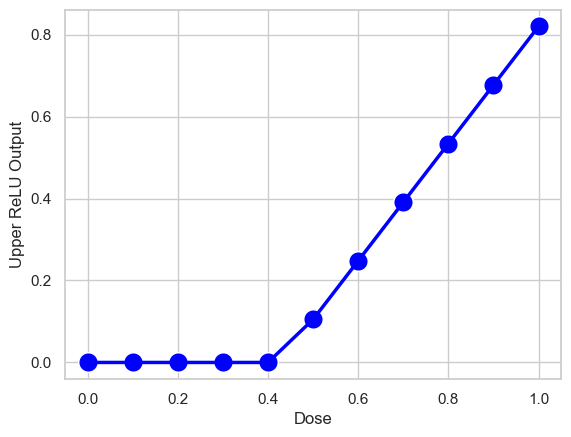

In [10]:
## Now draw a graph of the input doses and the y-axis output values from the ReLU

## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## First, draw the individual points
sns.scatterplot(x=input_doses,
                y=top_y_axis_values,
                color='blue',
                s=200)

## Now connect those points with a line
sns.lineplot(x=input_doses,
             y=top_y_axis_values,
             color='blue',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Upper ReLU Output')
plt.xlabel('Dose')

## Draw a graph of the output from the bottom activation function relative to the input values.

In [11]:
## now multiply the doses by the weight (w2) and add the bias (b2) on
## the connection from the input to the bottom activation function.
bottom_x_axis_values = (model.w2 * input_doses) + model.b2
bottom_x_axis_values

tensor([-0.2700, -0.0070,  0.2560,  0.5190,  0.7820,  1.0450,  1.3080,  1.5710,
         1.8340,  2.0970,  2.3600])

In [12]:
## now run those x-axis values through the ReLU...
bottom_y_axis_values = F.relu(bottom_x_axis_values)
bottom_y_axis_values

tensor([0.0000, 0.0000, 0.2560, 0.5190, 0.7820, 1.0450, 1.3080, 1.5710, 1.8340,
        2.0970, 2.3600])

Text(0.5, 0, 'Dose')

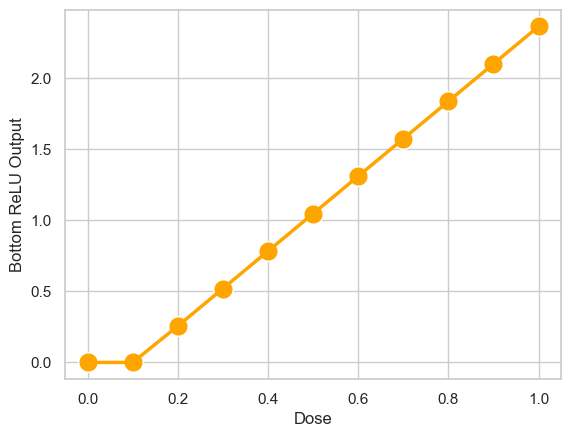

In [13]:
## Now draw a graph of the input doses and the y-axis output values from the ReLU

## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## First, draw the individual points
sns.scatterplot(x=input_doses,
                y=bottom_y_axis_values,
                color='orange',
                s=200)

## Now connect those points with a line
sns.lineplot(x=input_doses,
             y=bottom_y_axis_values,
             color='orange',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Bottom ReLU Output')
plt.xlabel('Dose')

## Draw a graph of the outputs from the top and bottom activation functions relative to the input values.

Text(0.5, 0, 'Dose')

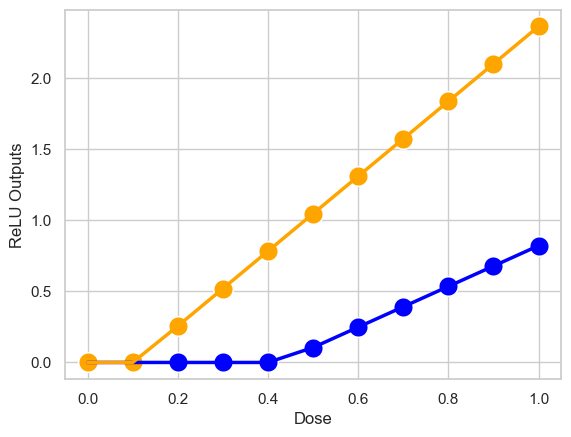

In [14]:
## Now put both bent shapes on the same graph...

## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## Draw the individual points (top)
sns.scatterplot(x=input_doses,
                y=top_y_axis_values,
                color='blue',
                s=200)

## Connect those points with a line (top)
sns.lineplot(x=input_doses,
             y=top_y_axis_values,
             color='blue',
             linewidth=2.5)

## Draw the individual points (bottom)
sns.scatterplot(x=input_doses,
                y=bottom_y_axis_values,
                color='orange',
                s=200)

## Connect those points with a line (bottom)
sns.lineplot(x=input_doses,
             y=bottom_y_axis_values,
             color='orange',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('ReLU Outputs')
plt.xlabel('Dose')

## Now stretch those bent shapes by scaling them by the final weights in the neural network

In [15]:
final_top_y_axis_values = top_y_axis_values * model.w3
final_top_y_axis_values

tensor([-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.4084, -0.9647, -1.5210,
        -2.0773, -2.6335, -3.1898])

In [16]:
final_bottom_y_axis_values = bottom_y_axis_values * model.w4
final_bottom_y_axis_values

tensor([0.0000, 0.0000, 0.3456, 0.7007, 1.0557, 1.4108, 1.7658, 2.1209, 2.4759,
        2.8310, 3.1860])

Text(0.5, 0, 'Dose')

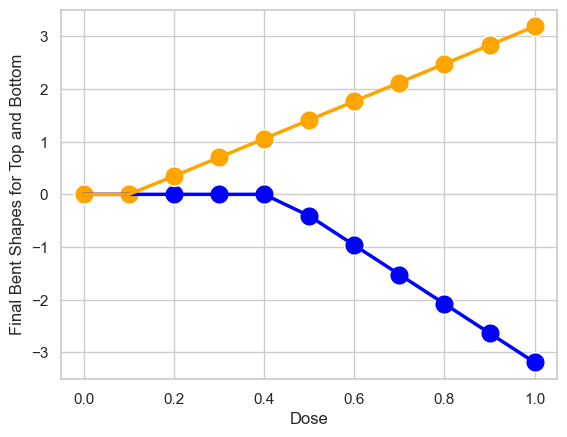

In [17]:
## Now put both bent shapes on the same graph...

## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## Draw the individual points (top)
sns.scatterplot(x=input_doses,
                y=final_top_y_axis_values,
                color='blue',
                s=200)

## Connect those points with a line (top)
sns.lineplot(x=input_doses,
             y=final_top_y_axis_values,
             color='blue',
             linewidth=2.5)

## Draw the individual points (bottom)
sns.scatterplot(x=input_doses,
                y=final_bottom_y_axis_values,
                color='orange',
                s=200)

## Connect those points with a line (bottom)
sns.lineplot(x=input_doses,
             y=final_bottom_y_axis_values,
             color='orange',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Final Bent Shapes for Top and Bottom')
plt.xlabel('Dose')

## Lastly, let's show final bent shape that we get when we add together the two bent shapes.

In [18]:
final_bent_shape = final_top_y_axis_values + final_bottom_y_axis_values
final_bent_shape

tensor([ 0.0000,  0.0000,  0.3456,  0.7007,  1.0557,  1.0023,  0.8011,  0.5999,
         0.3986,  0.1974, -0.0038])

Text(0.5, 0, 'Dose')

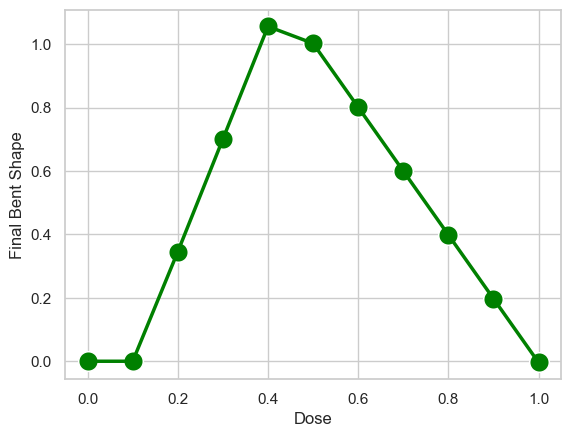

In [19]:
## Now put both bent shapes on the same graph...

## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## Draw the individual points
sns.scatterplot(x=input_doses,
                y=final_bent_shape,
                color='green',
                s=200)

## Connect those points with a line
sns.lineplot(x=input_doses,
             y=final_bent_shape,
             color='green',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Final Bent Shape')
plt.xlabel('Dose')

# TRIPLE BAM!!!